# Bulk energy

In chapter 3, we will learn how to perform various energy calculations.

 - Binding energy
 - Cohesive energy
 - Vacancy formation energy
 - Surface energy
 - Interface energy
 - Excess energy
 - Adsorption energy

By evaluating these energies, we can analyze what kind of materials or structures are stable.
We will introduce the binding energy for molecular systems, the cohesive energy for crystal systems, and the vacancy formation energy for systems with defects in crystals.

## Binding energy

It is defined as the difference in energy when the atoms are combined as a molecule from its isolated state.

$$E_{\rm{binding}} = E_{\rm{molecule}} - E_{\rm{isolated}}$$

The binding energy $E_{\rm{binding}}$ is obtained by taking $E_{\rm{molecule}}$ as the energy of the molecule and $E_{\rm{isolated}}$ as the energy of the isolated system.

A molecule is composed of multiple atoms and multiple bonds. 
The energy required to isolate all of the atoms that make up a molecule is sometimes referred to as atomization energy.

Here we will try to find the binding energy of the hydrogen molecule H2.

In [1]:
import pfp_api_client
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode


print(f"pfp_api_client: {pfp_api_client.__version__}")

estimator = Estimator(calc_mode=EstimatorCalcMode.CRYSTAL_U0, model_version="v3.0.0")
calculator = ASECalculator(estimator)

pfp_api_client: 1.18.0


`E_mol` is the energy of the hydrogen molecule, and we need to get the energy of the stable structure after the structural optimization. <br/>
`E_iso` is the energy of two hydrogen atoms in isolation. 
Since this is a single atom, the energy remains the same for any coordinate value, and no structural optimization is required.

In the following calculation, the energy of two H atoms in isolation is calculated by calculating the case of one H atom and multiplying by two.

In [2]:
from ase import Atoms
from ase.build import molecule
from ase.optimize import LBFGS

atoms_mol = molecule("H2")
atoms_mol.calc = calculator
LBFGS(atoms_mol).run()
E_mol = atoms_mol.get_potential_energy()
print(f"E_molecule = {E_mol:.2f} eV")

atoms_isolated = Atoms("H")
atoms_isolated.calc = calculator
E_iso = atoms_isolated.get_potential_energy() * 2
print(f"E_isolated = {E_iso:.2f} eV")

       Step     Time          Energy          fmax
LBFGS:    0 14:17:55       -4.528349        0.571417
LBFGS:    1 14:17:55       -4.532424        0.068936
LBFGS:    2 14:17:55       -4.532485        0.001519
E_molecule = -4.53 eV
E_isolated = -0.00 eV


In [3]:
E_bind = E_mol - E_iso

print(f"E_binding  = {E_bind:.2f} eV")

E_binding  = -4.53 eV


Calculations using the above definition yield a negative value for the binding energy, confirming that it is more stable when H makes a bond to form a hydrogen molecule than when two H atoms are in isolation.

In the following reference, the binding energy of H-H is listed as 4.5 eV, which was close to the result of this calculation.

 - https://websites.pmc.ucsc.edu/~fnimmo/website/binding_energies.pdf

The various energies we will discuss are basically negative when they are stable. <br/>
Absolute positive values are often written instead of negative values in the literature when it is obvious that they are negative.


### The energy difference is important, not the absolute value

The reference value for the energy of each element can be taken arbitrarily and varies with each potential energy calculation method. <br/>
Note that the various energies we will look at in this chapter are only meaningful for **the energy difference** between the structures whose number of elements is the same.

For example, we cannot directly compare the energy difference between an H2 molecule and a single H atom. <br/>
Also note that if the elements are replaced (e.g., H$_2$ and HO), the energies cannot be compared.

## Cohesive energy

Next, let's look at the cohesive energy of the crystal.

This is defined as the difference in energy when the atoms are agglomerated to form a crystal (bulk) from an isolated state.

$$E_{\rm{coh}} = E_{\rm{bulk}} - E_{\rm{isolated}}$$

If $E_{\rm{coh}}$ is calculated for a system consisting of $N$ atoms, the cohesive energy per atom is $E_{\rm{coh}}/N$.

For example, let us calculate the cohesive energy for the Au element. <br/>
In the following, we calculate energy per atom for an isolated Au 1 atom `au_iso` and Au crystal `au_bulk`.

At finite temperatures, `get_total_energy` also includes kinetic energy, but for now, we set it to 0, which corresponds to finding the cohesive energy at 0K.

In [4]:
import pfp_api_client
from pfp_api_client.pfp.calculators.ase_calculator import ASECalculator
from pfp_api_client.pfp.estimator import Estimator, EstimatorCalcMode


print(f"pfp_api_client: {pfp_api_client.__version__}")

estimator = Estimator(calc_mode=EstimatorCalcMode.CRYSTAL_U0, model_version="v3.0.0")
calculator = ASECalculator(estimator)

pfp_api_client: 1.18.0


In [5]:
from ase import Atoms
from ase.build import bulk
from ase.constraints import ExpCellFilter, StrainFilter
from ase.optimize import LBFGS

symbol = "Au"
au_iso = Atoms(symbol)
au_bulk = bulk(symbol)

au_iso.calc = calculator
E_iso = au_iso.get_total_energy()

au_bulk.calc = calculator
au_bulk_strain = StrainFilter(au_bulk)
opt = LBFGS(au_bulk_strain)
opt.run()
E_bulk = au_bulk.get_total_energy()

       Step     Time          Energy          fmax
LBFGS:    0 14:17:56       -3.002967        1.614090
LBFGS:    1 14:17:56       -3.026008        0.445113
LBFGS:    2 14:17:56       -3.028170        0.056708


/tmp/ipykernel_2119/3032443136.py:14: FutureWarning: Import StrainFilter from ase.filters
  au_bulk_strain = StrainFilter(au_bulk)


LBFGS:    3 14:17:56       -3.028207        0.000668


In [6]:
E_coh = E_bulk - E_iso

print(f"E_bulk     = {E_bulk:.2f} eV")
print(f"E_isolated = {E_iso:.2f} eV")
print(f"E_coh      = {E_coh:.2f} eV")

E_bulk     = -3.03 eV
E_isolated = -0.04 eV
E_coh      = -2.99 eV


In this example, the cohesive energy was obtained as `E_coh = -2.99` eV/atom. 
Cohesive energy is often expressed in eV/atom as a value per atom.

A negative value of the cohesive energy indicates that the atoms are more stable as a crystal than when each atom exists in isolation.

The visualization for bulk and isolated atoms are as follows

Both are the same single atom, but "isolated" represents a completely isolated atom with no periodic boundary, while "bulk" represents a system with a periodic boundary and an infinite series of crystals.

In [7]:
from ase.io import write
from IPython.display import Image

write("output/au_iso.png", au_iso, rotation="0x,0y,0z")
write("output/au_bulk.png", au_bulk, rotation="0x,0y,0z")

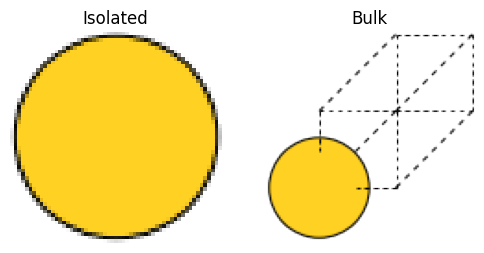

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, axes = plt.subplots(1, 2, figsize=(6, 3))
ax0, ax1 = axes
ax0.imshow(mpimg.imread("output/au_iso.png"))
ax0.set_axis_off()
ax0.set_title("Isolated")
ax1.imshow(mpimg.imread("output/au_bulk.png"))
ax1.set_axis_off()
ax1.set_title("Bulk")
fig.show()

In [9]:
from pfcc_extras.visualize.view import view_ngl

view_ngl([au_iso, au_bulk], replace_structure=True)

Let's run the above calculations for various elements.

In [10]:
def calc_cohesive_energy(symbol, calculator):
    atoms_iso = Atoms(symbol)
    atoms_bulk = bulk(symbol)

    atoms_iso.calc = calculator
    E_iso = atoms_iso.get_total_energy() / len(atoms_iso)

    atoms_bulk.calc = calculator
    atoms_bulk_strain = StrainFilter(atoms_bulk)
    opt = LBFGS(atoms_bulk_strain, logfile=None)
    opt.run()
    E_bulk = atoms_bulk.get_total_energy() / len(atoms_bulk)
    E_coh = E_bulk - E_iso
    print(f"{symbol}: E_bulk {E_bulk:.2f} - E_iso {E_iso:.2f} = E_coh {E_coh:.2f} eV/atom")
    return E_bulk, E_iso, E_coh

In [11]:
for symbol in ["Fe", "Co", "Ni", "Cu", "Pt", "Au"]:
    calc_cohesive_energy(symbol, calculator)

/tmp/ipykernel_2119/2154290698.py:9: FutureWarning: Import StrainFilter from ase.filters
  atoms_bulk_strain = StrainFilter(atoms_bulk)


Fe: E_bulk -5.00 - E_iso -0.03 = E_coh -4.97 eV/atom
Co: E_bulk -5.13 - E_iso 0.00 = E_coh -5.14 eV/atom
Ni: E_bulk -4.82 - E_iso 0.00 = E_coh -4.82 eV/atom
Cu: E_bulk -3.51 - E_iso 0.00 = E_coh -3.51 eV/atom
Pt: E_bulk -5.45 - E_iso -0.02 = E_coh -5.43 eV/atom
Au: E_bulk -3.03 - E_iso -0.04 = E_coh -2.99 eV/atom


Table 2. in the literature　"[Bulk Properties of Transition Metals: A Challenge for the Design of Universal Density Functionals](https://pubs.acs.org/doi/10.1021/ct500532v)" contains DFT calculations and experimental values of cohesive energy for each element.

Compared with PBE/GGA, which is the calculation condition of PFP CRYSTAL_U0 mode, we can see that the values are close.

Cohesive energy is defined not only for single elements but also for systems composed of multiple elements.

As an example, let us calculate the cohesive energy of GaAs. 
From the following references, the experimental value is reported as about 6.5~6.7 eV/GaAs.

 - Cohesive Energies: http://cmt.dur.ac.uk/sjc/thesis_ppr/node50.html
 - GaAs (zinc-blende)
http://www.ciss.iis.u-tokyo.ac.jp/theme/multi/material/periodic_detail/examples/GaAs_zb_gga/GaAs_zb_ggapbe.html


> Data retrieved from the Materials Project for GaAs (mp-2534) from database version v2021.11.10. <br/>
> https://next-gen.materialsproject.org/materials/mp-2534

In [12]:
from ase.io import read

atoms_bulk = read("../input/mp_2534-GaAs.cif")
view_ngl(atoms_bulk, representations=["ball+stick"])

First, the energy of GaAs as the above crystal is calculated as follows.
Here we use `ExpCellFilter` to optimize both the cell size and the coordinates of the atoms.

In [13]:
atoms_bulk.calc = calculator
atoms_bulk_strain = ExpCellFilter(atoms_bulk)
opt = LBFGS(atoms_bulk_strain)
opt.run()
E_bulk = atoms_bulk.get_total_energy()

print(f"E_bulk {E_bulk:.3f} eV")

       Step     Time          Energy          fmax
LBFGS:    0 14:18:04      -25.179112        0.239934
LBFGS:    1 14:18:04      -25.177724        0.516134


/tmp/ipykernel_2119/1596021643.py:2: FutureWarning: Import ExpCellFilter from ase.filters
  atoms_bulk_strain = ExpCellFilter(atoms_bulk)


LBFGS:    2 14:18:05      -25.179504        0.002928
E_bulk -25.180 eV


Next, the energy of the isolated system are calculated separately for Ga and As.

In [14]:
atoms_ga = Atoms("Ga")
atoms_ga.calc = calculator
E_ga = atoms_ga.get_total_energy()
atoms_as = Atoms("As")
atoms_as.calc = calculator
E_as = atoms_as.get_total_energy()

print(f"E_ga {E_ga:.2f} eV, E_as {E_as:.2f} eV")

E_ga -0.03 eV, E_as 0.00 eV


In [15]:
E_iso = E_ga + E_as
E_coh = E_bulk / len(atoms_bulk) * 2.0 - E_iso
print(f"E_coh {E_coh:.2f} eV/atom")

E_coh -6.27 eV/atom


To calculate the cohesive energy per pair of GaAs, `E_solid` is calculated for two atoms, and `E_iso` is the energy of Ga and As added together. <br/>
Comparing the above-obtained values with the experimental values, they are obtained with an error of about 5%.

## Vacancy formation energy

As the energy of a system with defects in the crystal, the vacancy formation energy is defined as

$$E_{\rm{V}} = E_{\rm{defect}} - E_{\rm{bulk}} \cdot N_{\rm{defect}} / N_{\rm{bulk}}$$

Here, the number of atoms in the system with defects is $N_{\rm{defect}}$, and energy is $E_{\rm{defect}}$, and the number of atoms in the crystalline system is $N_{\rm{bulk}}$ and energy is $E_{\rm{bulk}}$.

Let's calculate the energy of vacancy formation in Al crystals as an example.

Ideally, when creating a system with atomic vacancy, one atom would be removed from an infinite series of a crystal. 
But in practice, an infinitely large crystal cannot be calculated, so a sufficiently large crystal is created, and a defect structure is created by removing atoms from it.

In the following, a defect structure is created by creating a **supercell** (`size=(5, 5, 5)`) that is made larger by repeating the unit cell and removing one atom from it. <br/>
The defect structure assumes that defects occur only in a very small portion of a very large crystal (sparse defect structure), so larger supercell sizes are more appropriate for modeling, but on the other hand, too large a supercell size takes more computation time.
An appropriate size should be selected.

After the defect structure is created, the structural optimization is performed again because the stable structure is considered to be slightly different from the crystal arrangement.
However, since the lattice constant is not expected to change if there is only one defect in the crystal, the defect structure's lattice constant should not change from the lattice constant of the structure-optimized crystal structure.

In [16]:
symbol = "Al"
size = (5, 5, 5)

atoms_bulk = bulk(symbol) * size

atoms_bulk.calc = calculator
atoms_bulk_strain = ExpCellFilter(atoms_bulk)
opt = LBFGS(atoms_bulk_strain)
opt.run()
E_bulk = atoms_bulk.get_total_energy()

atoms_defect = atoms_bulk.copy()
# Create defect by removing 0-th atom
del atoms_defect[0]

atoms_defect.calc = calculator
opt = LBFGS(atoms_defect)
opt.run()
E_defect = atoms_defect.get_total_energy()
E_v = E_defect - E_bulk * len(atoms_defect) / len(atoms_bulk)

       Step     Time          Energy          fmax
LBFGS:    0 14:18:05     -427.703389        2.909615
LBFGS:    1 14:18:05     -419.520845      144.339664


/tmp/ipykernel_2119/1363110420.py:7: FutureWarning: Import ExpCellFilter from ase.filters
  atoms_bulk_strain = ExpCellFilter(atoms_bulk)


LBFGS:    2 14:18:05     -427.708278        0.896745
LBFGS:    3 14:18:05     -427.708634        0.274859
LBFGS:    4 14:18:05     -427.708603        0.012427
       Step     Time          Energy          fmax
LBFGS:    0 14:18:05     -423.542266        0.208453
LBFGS:    1 14:18:05     -423.549926        0.195295
LBFGS:    2 14:18:05     -423.603352        0.045197


The resulting vacancy formation energy is as follows

In [17]:
E_v = E_defect - E_bulk * len(atoms_defect) / len(atoms_bulk)
print(f"E_bulk  : {E_bulk:.2f} eV")
print(f"E_defect: {E_defect:.2f} eV")
print(f"E_v     : {E_v:.2f} eV")

E_bulk  : -427.71 eV
E_defect: -423.60 eV
E_v     : 0.68 eV


In [18]:
view_ngl([atoms_defect, atoms_bulk], replace_structure=True)

Let's make a method to run this calculation for various elements and supercell sizes.

In [19]:
def calc_vacancy_energy(symbol: str, calculator, size=(5, 5, 5)):

    atoms_bulk = bulk(symbol) * size

    atoms_bulk.calc = calculator
    atoms_bulk_strain = ExpCellFilter(atoms_bulk)
    opt = LBFGS(atoms_bulk_strain, logfile=None)
    opt.run()
    E_bulk = atoms_bulk.get_total_energy()

    atoms_defect = atoms_bulk.copy()
    # Create defect by removing 0-th atom
    del atoms_defect[0]

    atoms_defect.calc = calculator
    opt = LBFGS(atoms_defect, logfile=None)
    opt.run()
    E_defect = atoms_defect.get_total_energy()
    E_v = E_defect - E_bulk * len(atoms_defect) / len(atoms_bulk)
    return E_bulk, E_defect, E_v

In [20]:
for symbol in ["Al", "Cu", "Mo", "Ta", "Si"]:
    E_bulk, E_defect, E_v = calc_vacancy_energy(symbol=symbol, calculator=calculator)
    print(f"{symbol} E_v = {E_v:.2f} eV")

/tmp/ipykernel_2119/777994303.py:6: FutureWarning: Import ExpCellFilter from ase.filters
  atoms_bulk_strain = ExpCellFilter(atoms_bulk)


Al E_v = 0.68 eV
Cu E_v = 1.10 eV
Mo E_v = 3.47 eV
Ta E_v = 3.12 eV
Si E_v = 3.20 eV


Reference

 - Vacancy Formation Energy: http://micro.stanford.edu/mediawiki/images/2/29/VFE.pdf

Here you will find the vacancy formation energies calculated for the classical force field, which cannot be compared because of the different potential. 
But if we compare them for reference, we will see that the trends are generally similar.

Finally, let us examine the size dependence of the supercell for a better understanding.

In [21]:
symbol = "Al"
E_v_list = []
for i in range(2, 8):
    E_bulk, E_defect, E_v = calc_vacancy_energy(symbol=symbol, calculator=calculator, size=(i, i, i))
    print(f"{symbol} i = {i}, E_v = {E_v:.2f} eV")
    E_v_list.append(E_v)

/tmp/ipykernel_2119/777994303.py:6: FutureWarning: Import ExpCellFilter from ase.filters
  atoms_bulk_strain = ExpCellFilter(atoms_bulk)


Al i = 2, E_v = 0.76 eV
Al i = 3, E_v = 0.69 eV
Al i = 4, E_v = 0.72 eV
Al i = 5, E_v = 0.68 eV
Al i = 6, E_v = 0.67 eV
Al i = 7, E_v = 0.67 eV


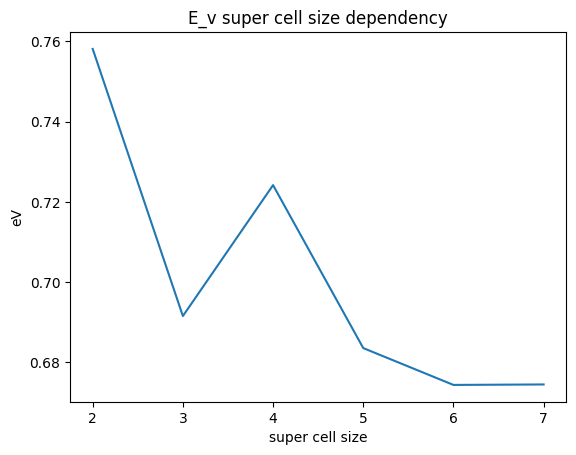

In [22]:
plt.plot(range(2, 8), E_v_list)
plt.title("E_v super cell size dependency")
plt.ylabel("eV")
plt.xlabel("super cell size")
plt.show()

As the supercell size increases, it converges to the correct value, but if the supercell size is too small, we see that the wrong value is obtained.